In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
data =pd.read_csv('E:/project/Advertising.csv')

In [3]:
data.shape

(200, 5)

In [4]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


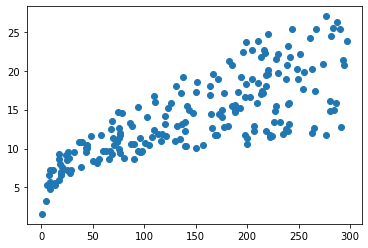

In [5]:
plt.scatter(data['TV'],data['sales'])

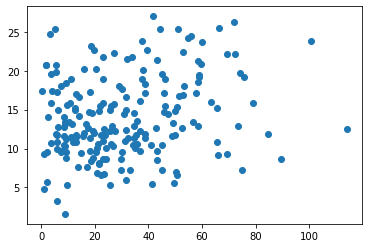

In [6]:
plt.scatter(data['newspaper'],data['sales'],)


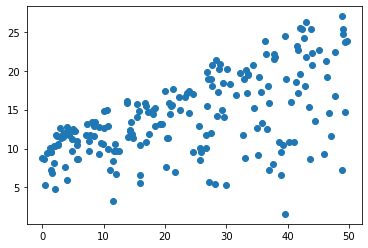

In [7]:
plt.scatter(data['radio'],data['sales'])

In [8]:
feature_cols=['TV']
x=data[feature_cols]
y=data['sales']

In [9]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(x,y)

LinearRegression()

In [10]:
ln.intercept_

7.032593549127693

In [11]:
ln.coef_

array([0.04753664])

In [12]:
x_new= pd.DataFrame({'tv':[50]})

In [13]:
x_new

,tv
0,50


In [14]:
ln.predict(x_new)

C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- tv
Feature names seen at fit time, yet now missing:
- TV

  warnings.warn(message, FutureWarning)


array([9.40942557])

In [15]:
x_new_1=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})

In [16]:
x_new_1

,TV
0,0.7
1,296.4


In [17]:
pred=ln.predict(x_new_1)

In [18]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=data).fit()

C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [19]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [21]:
lm.rsquared

0.611875050850071

In [22]:
feature_cols=['TV','radio','newspaper']
x=data[feature_cols]
y=data['sales']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [24]:
ln.intercept_

2.759772728635932

In [25]:
pred=ln.predict(x_test)
pred

array([ 4.26518299,  7.53325168, 17.54636718, 15.19679897,  6.24896778,
       15.81016341, 12.10351166, 17.86481072, 18.19047561,  7.72794377,
        8.77618137, 12.77294598, 23.35720988, 11.54792031, 12.562557  ,
        9.73059772, 14.99872627, 13.96790623, 16.8127105 ,  6.48854262])

In [26]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()

In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        19:20:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541
